In [1]:
import time
import matplotlib.pyplot as plt
import gym

# Method 1: Use local test class

In [3]:
import gym
from gym import spaces
class BasicEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [4]:
# method 1 - use local test class
env = BasicEnv()

We start at state = 0

In [5]:
env.reset()

0

and the agent can choose between 5 actions, numbered 0 to 4.

In [6]:
env.render("human")

In [7]:
action = env.action_space.sample()
print(action)

4


If they pick action = 2, they get a reward of 1, otherwise, the reward is -1. 

In [8]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 4


If we pick action = 2, they get a reward of 1

We just reset the state

In [65]:
env.reset()

0

We can define the action by hand inside the step

In [9]:
action=2
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 1 True {}
Reward = 1 with action = 2


otherwise

In [10]:
action=1
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 1


Once we have lerned how to pass the actions inside the step we can test further enviroments 

In [68]:
import numpy as np
from gym import spaces
# same as BasicEnv, with one difference: the reward for each action is a normal variable
# purpose is to see if we can use libraries

class BasicEnv2(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = gym.spaces.Discrete(5)
        self.observation_space = gym.spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        reward = np.random.normal(loc = action, scale = action)
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [69]:
# method 1 - use local test class
env = BasicEnv2()

In [70]:
env.reset()

0

In [71]:
env.render("human")

In [72]:
action = env.action_space.sample()

In [73]:
print(action)

2


In [74]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 2.789265547053389 True {}
Reward = 2.789265547053389 with action = 2


# Method 2: Build from gym package

Once the Enviroment were created 
``` 
gym-basic/
  setup.py
  gym_basic/
    __init__.py
    envs/
      __init__.py
      basic_env.py
      basic_env_2.py
```

pip install -e gym-basic

In [11]:
import gym
# method 2 - build from gym package
env = gym.make("gym_basic:basic-v0")

In [12]:
env.reset()
env.render("human")
action = env.action_space.sample()
print(action)

0


In [13]:
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 0


In [14]:
action=2
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 1 True {}
Reward = 1 with action = 2


In [31]:
# method 1 - build from gym package
env = gym.make("gym_basic:basic-v2")

In [34]:
env.reset()
env.render("human")

In [35]:
action = env.action_space.sample()
print(action)

3


In [36]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 3.311051392573194 True {}
Reward = 3.311051392573194 with action = 3


# Rendering - Part 1

The next step is load an image called 
**point_blue.png**, we just pointed the image at one fixed position.

We take the first enviroment **BasicEnv** and we modify as follows:

In [17]:
import gym
from gym import spaces

import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d

# --- New code begin---
BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
# Moreover we add a position in the screen display
worker_rect.topleft = (25, 25) # .center, .topright

# --- New code end---  

class BasicEnv3(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)
        
        # --- New code begin---
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))        
        # --- New code end--- 

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
        
        
        # --- New code begin---        
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        
        state=img
        # --- New code end---
        
        return state, reward, done, info
    
    
    def update_game_state(self):
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Blit assets ( we add the image to the game window)
        self.game_window.blit(worker_image, worker_rect)
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        

    def close(self):
        pass

In [18]:
# method 1 - use local test class
env = BasicEnv3()
env.reset()
action = env.action_space.sample()
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))

4
Reward = -1 with action = 4


-1 True {}


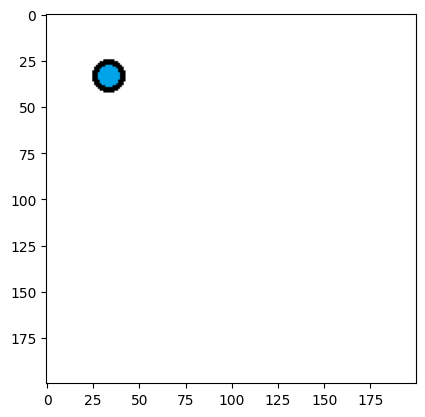

In [19]:
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

# Rendering - Part 2
We are interested now, to add an additional red point that will be the target 


In [20]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
# Moreover we add a position in the screen display
worker_rect.topleft = (25, 25)

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]
target_image = pygame.image.load("point_red.png")
target_rect = target_image.get_rect()
print('Initial position',100,100)
target_rect.center = (100, 100)

class BasicEnv4(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))        
        # --- New code end--- 

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
         
              
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
    
        
        return state, reward, done, info
    
    
    def update_game_state(self):
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Blit assets ( we add the image to the game window)
        self.game_window.blit(worker_image, worker_rect)
        self.game_window.blit(target_image, target_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        target_rect.center = (target_pos[0], target_pos[1])
        state = 0
        return state
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        

    def close(self):
        pass

Initial position 100 100


Target position 150 50
1
Reward = -1 with action = 1
-1 True {}


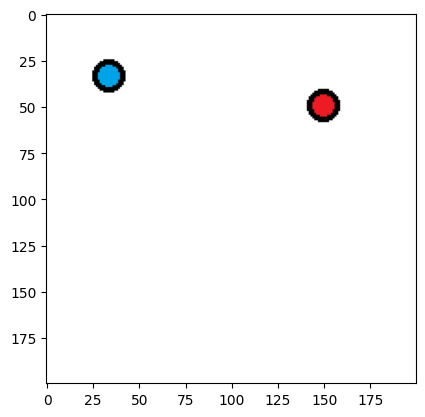

In [25]:
# method 1 - use local test class
env = BasicEnv4()
env.reset()
action = env.action_space.sample()
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

# Action - Part 1
We are interested now to add the input to the enviroment, let add just the four keys, up, down, left, right

In [35]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

class BasicEnv5(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]
        
        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])
        
        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        if action != None:
            print(self.worker_pos)
        #reward = self.seat_handler()
        # regardless of the action, game is done after a single step
        done = True
        info = {}
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        ################################################ 
        ########## CONVERT KEYPRESS TO DIRECTION ###### 
        ############################################## 
        elif event.type == pygame.KEYDOWN:
            
            if event.key == pygame.K_UP:
                action = 'UP'
            if event.key == pygame.K_DOWN:
                action = 'DOWN'
            if event.key == pygame.K_LEFT:
                action = 'LEFT'
            if event.key == pygame.K_RIGHT:
                action = 'RIGHT'
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        print(self.worker_pos[0],self.worker_pos[1])
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        self.game_window.blit(worker_image, self.worker_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        state = 0
        return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        if action == 'UP':
            worker_pos[1] -= 10
        if action == 'DOWN':
            worker_pos[1] += 10
        if action == 'LEFT':
            worker_pos[0] -= 10
        if action == 'RIGHT':
            worker_pos[0] += 10         
        return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

Initial position 100 100
Target position 100 50
action_n 0
UP
[25, 15]
25 15
Reward = 0 with action = UP
0 True {}


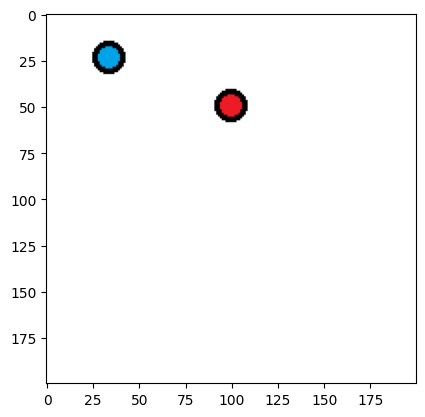

In [46]:
# method 1 - use local test class
env = BasicEnv5()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action_key={
       0:'UP',
       1:'DOWN',
       2:'RIGHT',
       3:'LEFT'}
action=action_key[action_n]
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [47]:
import sys
env = BasicEnv5()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None:
        print("Reward = {} with action = {}".format(reward,action))    
    
    '''
    # Check for move change based on action and Update worker Position
    worker_pos = env.move(env.action,env.worker_pos)
    print(worker_pos)
    #Draw the Screen
    env.game_window.fill(WHITE)

    #bg = pygame.image.load("background.png")
    #env.game_window.blit(bg, (0, 0))    
        
    worker_rect.x=worker_pos[0]
    worker_rect.y=worker_pos[1]
    # Draw desktop
    
    #Draw rectangles to represent the rect's of each object
    pygame.draw.rect(env.game_window, (0, 255, 0), target_rect, 1)
    pygame.draw.rect(env.game_window, (255, 255, 0), worker_rect, 1)
 
    #Blit assets
    env.game_window.blit(target_image, target_rect)
    env.game_window.blit(worker_image, worker_rect)
    '''

    # Check if we lost
    #env.game_over()
    #env.display_score(BLACK, 'consolas', 20)
    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial position 100 100
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
[35, 25]
35 25
Reward = 0 with action = RIGHT
[45, 25]
45 25
Reward = 0 with action = RIGHT
[55, 25]
55 25
Reward = 0 with action = RIGHT
[65, 25]
65 25
Reward = 0 with action = RIGHT
65 25
[75, 25]
75 25
Reward = 0 with action = RIGHT
75 25
75 25
75 25
75 25
75 25
[75, 35]
75 35
Reward = 0 with action = DOWN
[75, 45]
75 45
Reward = 0 with action = DOWN
75 45
75 45
75 45
75 45
75 45
[75, 55]
75 55
Reward = 0 with action = DOWN
75 55
75 55
[75, 65]
75 65
Reward = 0 with action = DOWN
75 65
[75, 75]
75 75
Reward = 0 with action = DOWN
75 75
75 75
[75, 85]
75 85
Reward = 0 with action = DOWN
75 85
[75, 95]
75 95
Reward = 0 with action = DOWN
75 95
[75, 105]
75 105
Reward = 0 with action = DOWN
75 105
[75, 115]
75 115
Reward = 0 with a

SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Action - Part 2
We are interested now to replace the keyboard input by the mouse 

In [41]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

class BasicEnv6(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(1)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]
        
        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])
        
        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        if action != None:
            print(self.worker_pos)
        #reward = self.seat_handler()
        # regardless of the action, game is done after a single step
        done = True
        info = {}
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            #dragon_rect.centerx = mouse_x
            #dragon_rect.centery = mouse_y
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = 'CLICK'            
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #print(self.worker_pos[0],self.worker_pos[1])
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        self.game_window.blit(worker_image, self.worker_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        state = 0
        return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        if action=='CLICK':
            return worker_pos
       
        return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

pygame 2.1.2 (SDL 2.0.18, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


Initial position 100 100
Target position 150 50
action_n 0
CLICK
[25, 25]
Reward = 0 with action = CLICK
0 True {}


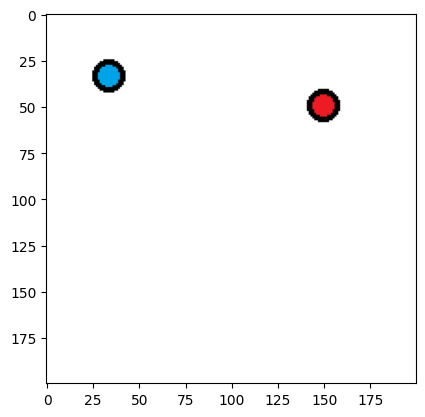

In [64]:
# method 1 - use local test class
env = BasicEnv6()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action_key={0:'CLICK'}
action=action_key[action_n]
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [42]:
import sys
env = BasicEnv6()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None:
        print("Reward = {} with action = {}".format(reward,action))    

    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial position 100 100
<Event(1025-MouseButtonDown {'pos': (81, 43), 'button': 1, 'touch': False, 'window': None})>
[81, 43]
Reward = 0 with action = CLICK
[81, 43]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (131, 65), 'button': 1, 'touch': False, 'window': None})>
[131, 65]
Reward = 0 with action = CLICK
[131, 65]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (49, 116), 'button': 1, 'touch': False, 'window': None})>
[49, 116]
Reward = 0 with action = CLICK
[49, 116]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (39, 82), 'button': 1, 'touch': False, 'window': None})>
[39, 82]
Reward = 0 with action = CLICK
[39, 82]
Reward = 0 with action = CLICK
[39, 82]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (76, 73), 'button': 1, 'touch': False, 'window': None})>
[76, 73]
Reward = 0 with action = CLICK
[76, 73]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (110, 120), 'button': 1, 'to

[99, 103]
Reward = 0 with action = CLICK
[99, 103]
Reward = 0 with action = CLICK
[99, 103]
Reward = 0 with action = CLICK
[99, 103]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (97, 100), 'rel': (-2, -3), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[97, 100]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (93, 95), 'rel': (-4, -5), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[93, 95]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (91, 91), 'rel': (-2, -4), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[91, 91]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (89, 91), 'rel': (-2, 0), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[89, 91]
Reward = 0 with action = CLICK
[89, 91]
Reward = 0 with action = CLICK
[89, 91]
Reward = 0 with action = CLICK
[89, 91]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (90, 91), 'rel': (1, 0), 'buttons': (1, 0, 0), 'touch': False, 

[93, 96]
Reward = 0 with action = CLICK
[93, 96]
Reward = 0 with action = CLICK
[93, 96]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (93, 95), 'rel': (0, -1), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[93, 95]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (93, 94), 'rel': (0, -1), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[93, 94]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (91, 93), 'rel': (-2, -1), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[91, 93]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (91, 91), 'rel': (0, -2), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[91, 91]
Reward = 0 with action = CLICK
[91, 91]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (30, 101), 'button': 1, 'touch': False, 'window': None})>
[30, 101]
Reward = 0 with action = CLICK
[30, 101]
Reward = 0 with action = CLICK
[30, 101]
Reward = 0 with action = CLICK
[30, 1

<Event(1025-MouseButtonDown {'pos': (63, 69), 'button': 1, 'touch': False, 'window': None})>
[63, 69]
Reward = 0 with action = CLICK
[63, 69]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (35, 159), 'button': 1, 'touch': False, 'window': None})>
[35, 159]
Reward = 0 with action = CLICK
[35, 159]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (100, 149), 'button': 1, 'touch': False, 'window': None})>
[100, 149]
Reward = 0 with action = CLICK
[100, 149]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (133, 95), 'button': 1, 'touch': False, 'window': None})>
[133, 95]
Reward = 0 with action = CLICK
[133, 95]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (27, 171), 'button': 1, 'touch': False, 'window': None})>
[27, 171]
Reward = 0 with action = CLICK
[27, 171]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (111, 167), 'button': 1, 'touch': False, 'window': None})>
[111, 167]
Reward = 0 wit

<Event(1024-MouseMotion {'pos': (89, 91), 'rel': (-1, -1), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[89, 91]
Reward = 0 with action = CLICK
[89, 91]
Reward = 0 with action = CLICK
[89, 91]
Reward = 0 with action = CLICK
[89, 91]
Reward = 0 with action = CLICK
<Event(1025-MouseButtonDown {'pos': (43, 85), 'button': 1, 'touch': False, 'window': None})>
[43, 85]
Reward = 0 with action = CLICK
[43, 85]
Reward = 0 with action = CLICK
[43, 85]
Reward = 0 with action = CLICK
[43, 85]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (45, 84), 'rel': (2, -1), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[45, 84]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (71, 88), 'rel': (26, 4), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[71, 88]
Reward = 0 with action = CLICK
<Event(1024-MouseMotion {'pos': (86, 95), 'rel': (15, 7), 'buttons': (1, 0, 0), 'touch': False, 'window': None})>
[86, 95]
Reward = 0 with action = CLICK
<Event(102

SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Part 3 - Definition of the Action and Observation Space

In this part we are interested to define the action space, i.e. all the posibilities allowed for an action and observation space. The values obtained in each action.
To do this we should define inse the __init__ class the space.



## What is observation space in gym?
The observation_space defines the structure as well as the legitimate values for the observation of the state of the environment. The observation can be different things for different environments.

In [21]:
#Example 1
import gym
import numpy as np
from gym import spaces
low  = np.zeros((1,))
print(low)
high = np.ones((1,))
print(high)
observation_space =gym.spaces.Box(low=low, high=high, shape=(1,), dtype=np.float64)


[0.]
[1.]


In [26]:
observation_space.sample()

array([0.16050786])

Box(n,) corresponds to the n-dimensional continuous space.

In our case n=1, thus the observational space of our environment is a 1-D space. Of course, the space is bounded by upper and lower limits which describe the legitimate values our observations can take. We can determine this using the high and low attributes of the observation space. These correspond to the maximum and minimum features  in our environment, respectively.



In [27]:
#Example 2
observation_space = spaces.Tuple((
        spaces.Discrete(32),
        spaces.Discrete(11),
        spaces.Discrete(2)))
# here spaces.Discrete(32) corresponds to the 32 possible possible values
# here spaces.Discrete(11) corresponds to the 11 possible values
# i.e.: [1,2,3,4,5,6,7,8,9,10,11]
# here spaces.Discrete(2) corresponds to the two possible uses of the ace: ie[0, 1]


In [31]:
observation_space.sample()

(15, 7, 0)

We see that both the observation space as well as the action space are represented by classes called Box and Discrete, respectively. 
These are one of the various data structures provided by gym in order to implement observation and action spaces for different kind of scenarios (discrete action space, continuous action space, etc). 

In [12]:
import pandas as pd
import numpy as np
from gym import spaces
df= pd.read_csv("test_dataset.csv")

In [13]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island
0,18.0,694.0,bari,floor_1,0,7
1,521.0,311.0,bari,floor_1,1,3
2,188.0,298.0,bari,floor_1,2,9
3,557.0,294.0,bari,floor_1,3,3
4,423.0,290.0,bari,floor_1,4,2


In [14]:
df['project'] = np.random.randint(1, 6, df.shape[0])
df['energy_consumption'] = np.random.randint(1, 6, df.shape[0])
df['emp_project'] = np.random.randint(1, 6, df.shape[0])
df['emp_energy_consumption'] = np.random.randint(1, 6, df.shape[0])

In [15]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
0,18.0,694.0,bari,floor_1,0,7,1,2,3,2
1,521.0,311.0,bari,floor_1,1,3,3,3,5,1
2,188.0,298.0,bari,floor_1,2,9,1,1,4,4
3,557.0,294.0,bari,floor_1,3,3,1,1,4,1
4,423.0,290.0,bari,floor_1,4,2,3,5,3,2


In [16]:
df = df.loc[df['building'] == 'bari']


In [17]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
0,18.0,694.0,bari,floor_1,0,7,1,2,3,2
1,521.0,311.0,bari,floor_1,1,3,3,3,5,1
2,188.0,298.0,bari,floor_1,2,9,1,1,4,4
3,557.0,294.0,bari,floor_1,3,3,1,1,4,1
4,423.0,290.0,bari,floor_1,4,2,3,5,3,2


In [18]:
df.shape

(57, 10)

In [19]:
df = df.loc[df['floor'] == 'floor_1']

In [20]:
df.shape

(20, 10)

In [21]:
#df.head()
feature1=df['island'].max()
feature2=df['project'].max()
feature3=df['energy_consumption'].max()
feature4=df['emp_project'].max()
feature5=df['emp_energy_consumption'].max()
low_x=int(df['x_coord'].min())
high_x=int(df['x_coord'].max())
low_y=int(df['y_coord'].min())
high_y=int(df['y_coord'].max())
possible_clicks=df.shape[0]
pos_x=possible_clicks
pos_y=possible_clicks
max_sit=possible_clicks

In [22]:
df.to_csv("test.csv", encoding='utf-8', index=False)

In [23]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
0,18.0,694.0,bari,floor_1,0,7,1,2,3,2
1,521.0,311.0,bari,floor_1,1,3,3,3,5,1
2,188.0,298.0,bari,floor_1,2,9,1,1,4,4
3,557.0,294.0,bari,floor_1,3,3,1,1,4,1
4,423.0,290.0,bari,floor_1,4,2,3,5,3,2


In [2]:
low_x,high_x,

(18, 557)

In [3]:
low_y,high_y,

(32, 694)

In [4]:
(possible_clicks)

57

In [35]:
#Action Space = The number of different "actions" that the AI can do for each Right-Click
action_space = spaces.MultiDiscrete([possible_clicks])
action_space.sample()
print("The action space: {}".format(action_space))

The action space: MultiDiscrete([57])


In [36]:
#Number of observations the AI can make. vector features for each possible click placement .
# (island, project, energy_consumption, emp_project,emp_energy_consumption, Right-Click)
observation_space = spaces.MultiDiscrete([feature1,feature2,feature3,feature4,feature5,possible_clicks])
observation_space.sample()
print("The observation space: {}".format(observation_space))

The observation space: MultiDiscrete([12  5  5  5  5 57])


In [15]:
# also we can use this way

In [66]:
observation_space = spaces.Tuple((
        spaces.Discrete(feature1),
        spaces.Discrete(feature2),
        spaces.Discrete(feature3),
        spaces.Discrete(feature4),
        spaces.Discrete(feature5),
        spaces.Discrete(pos_y),
        spaces.Discrete(pos_x)))
# here spaces.Discrete(12) corresponds to the 12 possible feature 1 possible
# here spaces.Discrete(5) corresponds to the 5 possible feature 2 which can be used
#             .
#             .
#             .
# here spaces.Discrete(57) corresponds to the all possible clicks of the mouse

In [67]:
observation_space.sample()

(9, 2, 0, 0, 3, 29, 4)

In [64]:
print("The observation space: {}".format(observation_space))

The observation space: Tuple(Discrete(12), Discrete(5), Discrete(5), Discrete(5), Discrete(5), Discrete(57), Discrete(57))


In [60]:
observation_space = gym.spaces.Dict(
    {"feature1": gym.spaces.Box(low=0, high=feature1, shape=(1,), dtype=np.uint8),
     "position_y": gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8),
     "position_x": gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8)
     }
        )

In [61]:
print("The observation space: {}".format(observation_space))

The observation space: Dict(feature1:Box(0, 12, (1,), uint8), position_x:Box(18, 45, (1,), uint8), position_y:Box(32, 182, (1,), uint8))


In [62]:
observation_space.sample()

OrderedDict([('feature1', array([12], dtype=uint8)),
             ('position_x', array([29], dtype=uint8)),
             ('position_y', array([110], dtype=uint8))])

The observation for this custom environment is an vector of features and positions given by the mouse representing position x and position y. 

In [70]:
observation_space = spaces.Tuple((
        spaces.Discrete(feature1),
        gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8),
        gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8)))
# here spaces.Discrete(feature) corresponds to the all feature1 possible 
# here spaces.Box() , the space is bounded by upper and lower limits which describe the legitimate values our observations can take

In [74]:
print("The observation space: {}".format(observation_space))

The observation space: Tuple(Discrete(12), Box(18, 45, (1,), uint8), Box(32, 182, (1,), uint8))


In [75]:
observation_space.sample()

(2, array([33], dtype=uint8), array([125], dtype=uint8))

In [3]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])
#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

class BasicEnv7(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(possible_clicks)
        self.observation_space = gym.spaces.Dict(
    {"feature1": gym.spaces.Box(low=0, high=feature1, shape=(1,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8),
     "x_position": gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8)
     }
        )
        
        # We inizialize the display
        self.frame_size_x = high_x
        self.frame_size_y = high_y
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]

        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])

        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        self.state = None
    
    def reward_value(self,worker,target):
        
         #Check for collision between two rects
        if worker.colliderect(target):
            print("worker, target",worker, target)
            reward=1
        else:
            reward=0
        return reward
    
    
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        # regardless of the action, game is done after a single step
        # We update the state with an image
        self.update_game_state()
        
        done = True
        info = {}

        if action != None:
            #print(self.worker_rect,self.target_rect)
            reward = self.reward_value(self.worker_rect,self.target_rect)

        if reward !=0:
            print("The worker rect is :",self.worker_rect)
            print("The target rect is :",self.target_rect )
        
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            #self.worker_pos[0]=mouse_x
            #self.worker_pos[1]=mouse_y
            #'CLICK'
            action = mouse_x, mouse_y
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            #self.worker_pos[0]=mouse_x
            #self.worker_pos[1]=mouse_y
            #'CLICK'
            action = mouse_x, mouse_y
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #print(self.worker_pos[0],self.worker_pos[1])
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        self.game_window.blit(worker_image, self.worker_rect)
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        self.state = self.observation_space.sample()
        sit_random = np.random.randint(1, 9)
        self.state['x_position'][sit_random:] = 0
        self.state['y_position'][sit_random:] = 0
        self.state['feature1'][sit_random:] = 0
    
        #state = 0
        #return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        else:
            return action
        #return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

In [13]:
# method 1 - use local test class
env = BasicEnv7()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
#print(state)
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

Initial position 100 100
Target position 100 50
action_n 42
(363, 141)


In [6]:
import sys
env = BasicEnv7()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None and reward!=0:
        print("Reward = {} with action = {}".format(reward,action))    

    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial position 100 100
worker, target <rect(103, 101, 18, 18)> <rect(91, 91, 18, 18)>
The worker rect is : <rect(103, 101, 18, 18)>
The target rect is : <rect(91, 91, 18, 18)>
Reward = 1 with action = (103, 101)
worker, target <rect(103, 101, 18, 18)> <rect(91, 91, 18, 18)>
The worker rect is : <rect(103, 101, 18, 18)>
The target rect is : <rect(91, 91, 18, 18)>
Reward = 1 with action = (103, 101)
worker, target <rect(91, 100, 18, 18)> <rect(91, 91, 18, 18)>
The worker rect is : <rect(91, 100, 18, 18)>
The target rect is : <rect(91, 91, 18, 18)>
Reward = 1 with action = (91, 100)
worker, target <rect(91, 100, 18, 18)> <rect(91, 91, 18, 18)>
The worker rect is : <rect(91, 100, 18, 18)>
The target rect is : <rect(91, 91, 18, 18)>
Reward = 1 with action = (91, 100)
worker, target <rect(98, 98, 18, 18)> <rect(91, 91, 18, 18)>
The worker rect is : <rect(98, 98, 18, 18)>
The target rect is : <rect(91, 91, 18, 18)>
Reward = 1 with action = (98, 98)
worker, target <rect(98, 98, 18, 18)> <rec

SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Part 1 Multiple Target Points

In this part we are goint to generalize the single points and get several points

In [1]:
import pandas as pd
df= pd.read_csv("test.csv")
feature1=df['island'].max()
feature2=df['project'].max()
feature3=df['energy_consumption'].max()
feature4=df['emp_project'].max()
feature5=df['emp_energy_consumption'].max()
low_x=int(df['x_coord'].min())
high_x=int(df['x_coord'].max())
low_y=int(df['y_coord'].min())
high_y=int(df['y_coord'].max())
possible_clicks=df.shape[0]
pos_x=possible_clicks
pos_y=possible_clicks
max_sit=possible_clicks

In [3]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
0,18.0,694.0,bari,floor_1,0,7,1,1,2,3
1,521.0,311.0,bari,floor_1,1,3,3,2,1,2
2,188.0,298.0,bari,floor_1,2,9,3,3,4,2
3,557.0,294.0,bari,floor_1,3,3,1,4,1,1
4,423.0,290.0,bari,floor_1,4,2,4,2,3,5


In [27]:
df.loc[df['island'] == 3]

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
1,521.0,311.0,bari,floor_1,1,3,3,3,5,1
3,557.0,294.0,bari,floor_1,3,3,1,1,4,1
5,507.0,278.0,bari,floor_1,5,3,3,5,3,1
6,542.0,262.0,bari,floor_1,6,3,3,4,4,5


In [3]:
import pygame
target_images={}
target_rects={}
possible_clicks=df.shape[0]
for action_n in range(possible_clicks):
    targets=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
    print('Initial positions',targets)
    target_images[action_n] = pygame.image.load("point_red.png")
    target_rects[action_n] = target_images[action_n].get_rect()
    target_rects[action_n].center = targets

Initial positions (18, 694)
Initial positions (521, 311)
Initial positions (188, 298)
Initial positions (557, 294)
Initial positions (423, 290)
Initial positions (507, 278)
Initial positions (542, 262)
Initial positions (456, 257)
Initial positions (387, 254)
Initial positions (423, 223)
Initial positions (506, 209)
Initial positions (337, 204)
Initial positions (472, 175)
Initial positions (544, 174)
Initial positions (372, 172)
Initial positions (303, 171)
Initial positions (423, 169)
Initial positions (87, 169)
Initial positions (508, 138)
Initial positions (336, 137)
Initial positions (179, 523)
Initial positions (136, 506)
Initial positions (197, 481)
Initial positions (154, 463)
Initial positions (21, 441)
Initial positions (57, 427)
Initial positions (97, 411)
Initial positions (40, 385)
Initial positions (82, 368)
Initial positions (176, 363)
Initial positions (380, 301)
Initial positions (89, 296)
Initial positions (428, 276)
Initial positions (35, 274)
Initial positions (171,

In [9]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])
#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")

target_rects={}
target_images={}

class BasicEnv8(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(possible_clicks)
        self.observation_space = gym.spaces.Dict(
    {"feature1": gym.spaces.Box(low=0, high=feature1, shape=(1,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8),
     "x_position": gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8)
     }
        )
        
        # We inizialize the display
        self.frame_size_x = high_x
        self.frame_size_y = high_y
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]

        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        
        
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])

        self.target_image = pygame.image.load("point_red.png")
        self.target_rect = target_image.get_rect()
        print('Initial position',100,100)
        self.target_rect.center = (100, 100)
        
        
        self.target_rects={}
        
        
        n_space=df.shape[0]
        for num in range(n_space):
            targets=int(df['x_coord'][num]), int(df['y_coord'][num])
            target_images[num] = pygame.image.load("point_red.png")
            self.target_rects[num] = target_images[num].get_rect()
            #print('Initial positions',targets)
            self.target_rects[num].center = targets
    
        self.state = None    
    
    def reward_value(self,worker,target):
        
        #Check for collision between two rects            
        if worker.colliderect(target):
            print("worker, target",worker, target)
            reward=1
        else:
            reward=0
        return reward
    
    
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        # regardless of the action, game is done after a single step
        # We update the state with an image
        self.update_game_state()
        
        done = True
        info = {}

        if action != None:
            #print(self.worker_rect,self.target_rect)
            
            n_space=df.shape[0]
            for num in range(n_space):
                reward = self.reward_value(self.worker_rect,self.target_rects[num])
                if reward !=0:
                    print("The worker rect is :",self.worker_rect)
                    print("The target rect is :",self.target_rects[num] )
                    print("reward",reward)
        
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            #self.worker_pos[0]=mouse_x
            #self.worker_pos[1]=mouse_y
            #'CLICK'
            action = mouse_x, mouse_y
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            #self.worker_pos[0]=mouse_x
            #self.worker_pos[1]=mouse_y
            #'CLICK'
            action = mouse_x, mouse_y
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #print(self.worker_pos[0],self.worker_pos[1])
        
        # -------------WORKER--------------
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (255, 255, 0), self.worker_rect, 1)
        #Blit assets
        self.game_window.blit(worker_image, self.worker_rect)
        
        #-------------- Single point TARGET------------------
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rect, 1)
        #Blit assets
        self.game_window.blit(target_image, self.target_rect)
        
        #-------------- Multiple points TARGETS------------------
        n_space=df.shape[0]
        for num in range(n_space):
            pygame.draw.rect(self.game_window, (0, 255, 0), self.target_rects[num], 1)
            self.game_window.blit(target_images[num], self.target_rects[num])
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        self.target_rect.center = (target_pos[0], target_pos[1])
        self.state = self.observation_space.sample()
        sit_random = np.random.randint(1, 9)
        self.state['x_position'][sit_random:] = 0
        self.state['y_position'][sit_random:] = 0
        self.state['feature1'][sit_random:] = 0
    
        #state = 0
        #return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        else:
            return action
        #return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

Initial position 100 100
Target position 150 50
action_n 44
(291, 135)
worker, target <rect(291, 135, 18, 18)> <rect(282, 126, 18, 18)>
The worker rect is : <rect(291, 135, 18, 18)>
The target rect is : <rect(282, 126, 18, 18)>
reward 1
Reward = 0 with action = (291, 135)
0 True {}


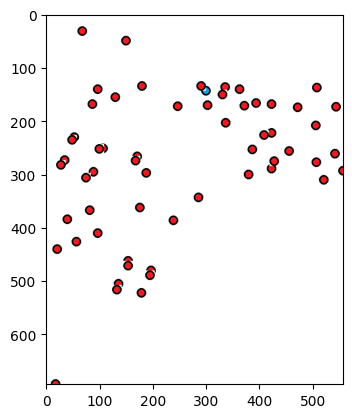

In [19]:
# method 1 - use local test class
env = BasicEnv8()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
#print(state)
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [11]:
import sys
env = BasicEnv8()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None and reward!=0:
        print("Reward = {} with action = {}".format(reward,action))    

    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial position 100 100
worker, target <rect(280, 336, 18, 18)> <rect(277, 335, 18, 18)>
The worker rect is : <rect(280, 336, 18, 18)>
The target rect is : <rect(277, 335, 18, 18)>
reward 1
worker, target <rect(280, 336, 18, 18)> <rect(277, 335, 18, 18)>
The worker rect is : <rect(280, 336, 18, 18)>
The target rect is : <rect(277, 335, 18, 18)>
reward 1
worker, target <rect(280, 336, 18, 18)> <rect(277, 335, 18, 18)>
The worker rect is : <rect(280, 336, 18, 18)>
The target rect is : <rect(277, 335, 18, 18)>
reward 1
worker, target <rect(280, 336, 18, 18)> <rect(277, 335, 18, 18)>
The worker rect is : <rect(280, 336, 18, 18)>
The target rect is : <rect(277, 335, 18, 18)>
reward 1
worker, target <rect(280, 336, 18, 18)> <rect(277, 335, 18, 18)>
The worker rect is : <rect(280, 336, 18, 18)>
The target rect is : <rect(277, 335, 18, 18)>
reward 1
worker, target <rect(280, 336, 18, 18)> <rect(277, 335, 18, 18)>
The worker rect is : <rect(280, 336, 18, 18)>
The target rect is : <rect(277, 33

SystemExit: 

# Let us replace the png files by a simple color point

In [26]:
import pygame

window = pygame.display.set_mode((500,500))
red = (200,0,0)
circleX = 100
circleY = 100
radius = 5
active = True
while active:
   for event in pygame.event.get():
      if event.type == pygame.QUIT:
         active = False

   pygame.draw.circle(window,red,(circleX,circleY),radius) # DRAW CIRCLE

   pygame.display.update()

In [26]:
#We load again the test dataset

In [27]:
import pandas as pd
df= pd.read_csv("test.csv")
feature1=df['island'].max()
feature2=df['project'].max()
feature3=df['energy_consumption'].max()
feature4=df['emp_project'].max()
feature5=df['emp_energy_consumption'].max()
low_x=int(df['x_coord'].min())
high_x=int(df['x_coord'].max())
low_y=int(df['y_coord'].min())
high_y=int(df['y_coord'].max())
possible_clicks=df.shape[0]
pos_x=possible_clicks
pos_y=possible_clicks
max_sit=possible_clicks

In [28]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

WHITE = pygame.Color(255, 255, 255)
RED = (200,0,0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

#Load images
#To the image we assing a kind of gym object
worker_pos=[25,25]
#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_rects={}
target_images={}

class BasicEnv9(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(possible_clicks)
        self.observation_space = gym.spaces.Dict(
    {"feature1": gym.spaces.Box(low=0, high=feature1, shape=(1,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8),
     "x_position": gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8)
     }
        )
        
        # We inizialize the display
        self.frame_size_x = high_x
        self.frame_size_y = high_y
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        

        #Load images
        #To the image we assing a kind of gym object
        self.worker_pos=[25,25]
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_pos[0], self.worker_pos[1]),6) # DRAW CIRCLE

        # Moreover we add a position in the screen display

        self.target_rects={} 
        n_space=df.shape[0]
        for num in range(n_space):
            targets=int(df['x_coord'][num]), int(df['y_coord'][num])
            target_images[num] = pygame.draw.circle(self.game_window,RED,(targets[0], targets[1]),6) # DRAW CIRCLE
            self.target_rects[num] = target_images[num]
            #print('Initial positions',targets)
            self.target_rects[num].center = targets
    
        self.state = None    
    
    def reward_value(self,worker,target):
        
        #Check for collision between two rects            
        if worker.colliderect(target):
            print("worker, target",worker, target)
            reward=1
        else:
            reward=0
        return reward
    
    
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        # regardless of the action, game is done after a single step
        # We update the state with an image
        self.update_game_state()
        
        done = True
        info = {}

        if action != None:
            #print(self.worker_rect,self.target_rect)
            
            n_space=df.shape[0]
            for num in range(n_space):
                reward = self.reward_value(self.worker_rect,self.target_rects[num])
                if reward !=0:
                    print("The worker rect is :",self.worker_rect)
                    print("The target rect is :",self.target_rects[num] )
                    print("reward",reward)
        
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]

            #'CLICK'
            action = mouse_x, mouse_y
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            
            #'CLICK'
            action = mouse_x, mouse_y
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        # -------------WORKER--------------
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        #Draw rectangles to represent the rect's of each object
        pygame.draw.circle(self.game_window,BLUE,(self.worker_rect.x,self.worker_rect.y),6) # DRAW CIRCLE
        
        
        #-------------- Multiple points TARGETS------------------
        n_space=df.shape[0]
        for num in range(n_space):
            pygame.draw.circle(self.game_window,RED,(self.target_rects[num].x,self.target_rects[num].y),6) # DRAW CIRCLE
    
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        self.state = self.observation_space.sample()        
        sit_random = np.random.randint(1, 9)
        self.state['x_position'][sit_random:] = 0
        self.state['y_position'][sit_random:] = 0
        self.state['feature1'][sit_random:] = 0
    
        #state = 0
        #return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        else:
            return action
        #return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

action_n 50
(239, 387)
worker, target <rect(239, 387, 12, 12)> <rect(233, 381, 12, 12)>
The worker rect is : <rect(239, 387, 12, 12)>
The target rect is : <rect(233, 381, 12, 12)>
reward 1
Reward = 0 with action = (239, 387)
0 True {}


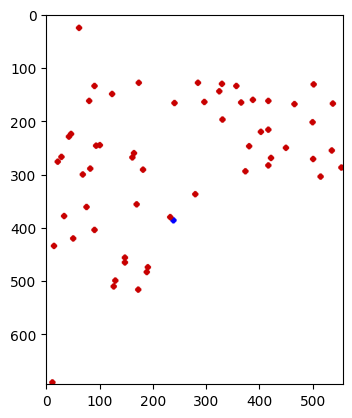

In [25]:
# method 1 - use local test class
env = BasicEnv9()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
#print(state)
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [29]:
import sys
env = BasicEnv9()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None and reward!=0:
        print("Reward = {} with action = {}".format(reward,action))    

    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

worker, target <rect(283, 337, 12, 12)> <rect(280, 338, 12, 12)>
The worker rect is : <rect(283, 337, 12, 12)>
The target rect is : <rect(280, 338, 12, 12)>
reward 1
worker, target <rect(283, 337, 12, 12)> <rect(280, 338, 12, 12)>
The worker rect is : <rect(283, 337, 12, 12)>
The target rect is : <rect(280, 338, 12, 12)>
reward 1
worker, target <rect(181, 290, 12, 12)> <rect(182, 292, 12, 12)>
The worker rect is : <rect(181, 290, 12, 12)>
The target rect is : <rect(182, 292, 12, 12)>
reward 1
worker, target <rect(181, 290, 12, 12)> <rect(182, 292, 12, 12)>
The worker rect is : <rect(181, 290, 12, 12)>
The target rect is : <rect(182, 292, 12, 12)>
reward 1
worker, target <rect(125, 508, 12, 12)> <rect(130, 500, 12, 12)>
The worker rect is : <rect(125, 508, 12, 12)>
The target rect is : <rect(130, 500, 12, 12)>
reward 1
worker, target <rect(125, 508, 12, 12)> <rect(127, 511, 12, 12)>
The worker rect is : <rect(125, 508, 12, 12)>
The target rect is : <rect(127, 511, 12, 12)>
reward 1
work

SystemExit: 

# Adding colors to the life
Let us add the colors to each island of points.
But before let us recap some concepts of colors

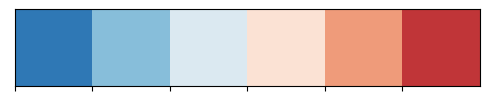

In [4]:
import  seaborn
from matplotlib import colors
from PIL import ImageColor
seaborn.palplot(seaborn.color_palette("RdBu_r", 6))

In [66]:
def convert_colormap_to_rgb(cmap, x, vmin=0, vmax=1):
    """
    Example::
        >>> seaborn.palplot(seaborn.color_palette("RdBu_r", 6))
        >>> colorMapRGB = seaborn.color_palette("RdBu_r", 6)
        >>> colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
        >>> [convert_colormap_to_rgb(colormap, x, vmin=-2, vmax=2) for x in range(-2, 3)]
        [(47, 121, 181),
        (157, 201, 224),
        (236, 230, 227),
        (243, 172, 144),
        (193, 54, 57)
    """
    norm = colors.Normalize(vmin, vmax)
    color_rgb = plt.cm.get_cmap(cmap)(norm(x))
    color_hex = colors.rgb2hex(color_rgb)
    value_rgb=ImageColor.getcolor(color_hex, "RGB")
    return value_rgb

In [67]:
[convert_colormap_to_rgb(colormap, x, vmin=-2, vmax=2) for x in range(-2, 3)]

[(47, 121, 181),
 (157, 201, 224),
 (236, 230, 227),
 (243, 172, 144),
 (193, 54, 57)]

In [47]:
def convert_colormap_to_hex(cmap, x, vmin=0, vmax=1):
    """
    Example::
        >>> seaborn.palplot(seaborn.color_palette("RdBu_r", 7))
        >>> colorMapRGB = seaborn.color_palette("RdBu_r", 61)
        >>> colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
        >>> [convert_colormap_to_hex(colormap, x, vmin=-2, vmax=2) for x in range(-2, 3)]
        ['#09386d', '#72b1d3', '#f7f6f5', '#e7866a', '#730421']
    """
    norm = colors.Normalize(vmin, vmax)
    color_rgb = plt.cm.get_cmap(cmap)(norm(x))
    color_hex = colors.rgb2hex(color_rgb)
    return color_hex

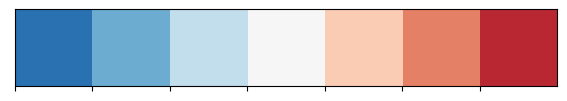

In [48]:
seaborn.palplot(seaborn.color_palette("RdBu_r", 7))

In [75]:
colorMapRGB = seaborn.color_palette("RdBu_r", 10)

In [76]:
colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')

In [85]:
max_colors

9

In [89]:
int(max_colors/2)

4

In [96]:
[convert_colormap_to_hex(colormap, x, vmin=-int(max_colors/2)-1, vmax=int(max_colors/2)+1) for x in range(-int(max_colors/2)-1, int(max_colors/2)+1)]

['#1e61a5',
 '#3985bb',
 '#6eadd1',
 '#a6cee3',
 '#d5e6f0',
 '#f0edea',
 '#faddcd',
 '#f5b69c',
 '#e6846a',
 '#cb4b43']

In [97]:
len([convert_colormap_to_hex(colormap, x, vmin=-int(max_colors/2)-1, vmax=int(max_colors/2)+1) for x in range(-int(max_colors/2)-1, int(max_colors/2)+1)])

10

In [52]:
ImageColor.getcolor('#2a71b2', "RGB")



(42, 113, 178)

In [53]:
ImageColor.getcolor('#97c5de', "RGB")


(151, 197, 222)

In [106]:
import pandas as pd
df= pd.read_csv("test.csv")
feature1=df['island'].max()
feature2=df['project'].max()
feature3=df['energy_consumption'].max()
feature4=df['emp_project'].max()
feature5=df['emp_energy_consumption'].max()
max_colors=df['island'].nunique()
low_x=int(df['x_coord'].min())
high_x=int(df['x_coord'].max())
low_y=int(df['y_coord'].min())
high_y=int(df['y_coord'].max())
possible_clicks=df.shape[0]
pos_x=possible_clicks
pos_y=possible_clicks
max_sit=possible_clicks

In [107]:
df.head()

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
0,18.0,694.0,bari,floor_1,0,7,1,2,3,2
1,521.0,311.0,bari,floor_1,1,3,3,3,5,1
2,188.0,298.0,bari,floor_1,2,9,1,1,4,4
3,557.0,294.0,bari,floor_1,3,3,1,1,4,1
4,423.0,290.0,bari,floor_1,4,2,3,5,3,2


In [111]:
n_by_island = df.groupby("island").count()

In [105]:
n_by_island 

,x_coord,y_coord,building,floor,seat_id,project,energy_consumption,emp_project,emp_energy_consumption
island,,,,,,,,,
0,2,2,2,2,2,2,2,2,2
1,4,4,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4
4,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1


In [114]:
df.loc[df['island'] == 1]

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
11,337.0,204.0,bari,floor_1,11,1,5,2,3,5
14,372.0,172.0,bari,floor_1,14,1,3,4,5,3
15,303.0,171.0,bari,floor_1,15,1,5,5,1,2
19,336.0,137.0,bari,floor_1,19,1,2,2,5,4


In [132]:
df.loc[df['island'] == 1]

,x_coord,y_coord,building,floor,seat_id,island,project,energy_consumption,emp_project,emp_energy_consumption
11,337.0,204.0,bari,floor_1,11,1,5,2,3,5
14,372.0,172.0,bari,floor_1,14,1,3,4,5,3
15,303.0,171.0,bari,floor_1,15,1,5,5,1,2
19,336.0,137.0,bari,floor_1,19,1,2,2,5,4


In [133]:
df['island'].iloc[11]

1

In [121]:
 df.groupby(['island'])['island'].count()

island
0    2
1    4
2    4
3    4
4    1
5    1
6    1
7    1
8    1
9    1
Name: island, dtype: int64

In [125]:
counts = df.groupby(['island'])['island'].count()

In [128]:
counts.to_dict()

{0: 2, 1: 4, 2: 4, 3: 4, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

In [126]:
reward_dict=counts.to_dict()

In [129]:
reward_dict[0]

2

In [127]:
type(counts)

pandas.core.series.Series

In [112]:
df.value_counts()

x_coord  y_coord  building  floor    seat_id  island  project  energy_consumption  emp_project  emp_energy_consumption
557.0    294.0    bari      floor_1  3        3       1        1                   4            1                         1
544.0    174.0    bari      floor_1  13       6       2        2                   3            5                         1
87.0     169.0    bari      floor_1  17       5       3        5                   1            3                         1
188.0    298.0    bari      floor_1  2        9       1        1                   4            4                         1
303.0    171.0    bari      floor_1  15       1       5        5                   1            2                         1
336.0    137.0    bari      floor_1  19       1       2        2                   5            4                         1
337.0    204.0    bari      floor_1  11       1       5        2                   3            5                         1
372.0    172.

In [39]:
max_colors=df['island'].max()

In [ ]:
.nunique()

In [70]:
df['island'].nunique()

10

In [40]:
max_colors

9

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

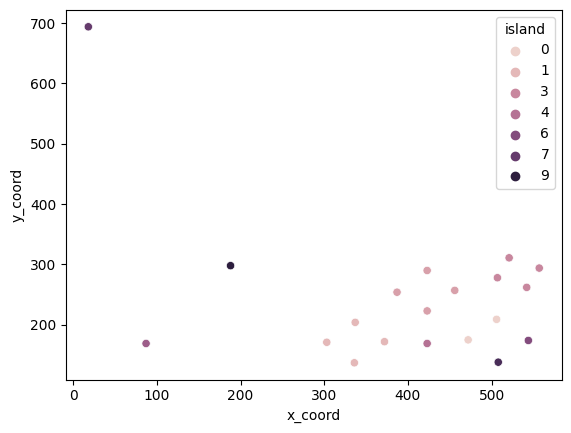

In [35]:
sns.scatterplot(data=df, x="x_coord", y="y_coord",hue='island')

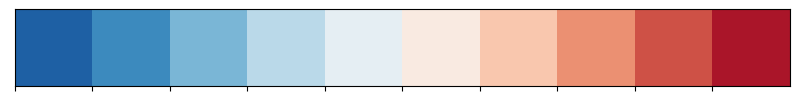

In [41]:
seaborn.palplot(seaborn.color_palette("RdBu_r", max_colors+1))

In [37]:
max_colors

9

In [72]:
colorMapRGB = seaborn.color_palette("RdBu_r", max_colors+1)
colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')

In [74]:
colorMapRGB

[(0.11864667435601696, 0.37923875432525955, 0.6456747404844292),
 (0.23660130718954256, 0.5418685121107267, 0.7470203767781622),
 (0.4814302191464823, 0.7148788927335641, 0.839446366782007),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9797001153402538, 0.784083044982699, 0.6848904267589389),
 (0.9222606689734718, 0.5674740484429066, 0.44867358708189153),
 (0.8115340253748559, 0.32110726643598614, 0.27581699346405225),
 (0.6692041522491349, 0.08489042675893888, 0.16401384083044984)]

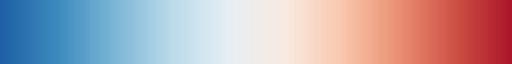

In [73]:
colormap

In [71]:

[convert_colormap_to_hex(colormap, x, vmin=-int(max_colors/2)-1, vmax=int(max_colors/2)+1) for x in range(-int(max_colors/2)-1, int(max_colors/2)+1)]

[(30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (30, 97, 165),
 (171, 22, 42),
 (171, 22, 42),
 (171, 22, 42),
 (171, 22, 42),
 (171, 22, 42),
 (171, 22, 42),
 (171, 22, 42),
 (171, 22, 42)]

In [64]:
df.shape[0]

20

In [68]:
max_colors

9

In [67]:
cmap_list =[convert_colormap_to_hex(colormap, x, vmin=-int(max_colors/2)-1, vmax=int(max_colors/2)+1) for x in range(-int(max_colors/2)-1, int(max_colors/2)+1)]

[(32, 101, 171),
 (32, 101, 171),
 (32, 101, 171),
 (32, 101, 171),
 (32, 101, 171),
 (177, 24, 43),
 (177, 24, 43),
 (177, 24, 43)]

In [66]:
n_space=df.shape[0]
for num in range(n_space):
    cluster=df['island'][num]
    print(num,cluster)

0 7
1 3
2 9
3 3
4 2
5 3
6 3
7 2
8 2
9 2
10 0
11 1
12 0
13 6
14 1
15 1
16 4
17 5
18 8
19 1


In [ ]:
n_space=df.shape[0]
for num in range(n_space):
    cluster=df['island'][num]
    cmap_color=cmap_list[cluster]

In [44]:
len([convert_colormap_to_rgb(colormap, x,) for x in range(-int(max_colors), int(max_colors))])

18

In [137]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import pygame
from pygame import display
from pygame.surfarray import array3d
import random

WHITE = pygame.Color(255, 255, 255)
RED = (200,0,0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

#Load images
#To the image we assing a kind of gym object
worker_pos=[25,25]
#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_rects={}
target_images={}

counts = df.groupby(['island'])['island'].count()
reward_dict=counts.to_dict()

def convert_colormap_to_rgb(cmap, x, vmin=0, vmax=1):
    """
    Example::
        >>> seaborn.palplot(seaborn.color_palette("RdBu_r", 6))
        >>> colorMapRGB = seaborn.color_palette("RdBu_r", 6)
        >>> colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
        >>> [convert_colormap_to_rgb(colormap, x, vmin=-2, vmax=2) for x in range(-2, 3)]
        [(47, 121, 181),
        (157, 201, 224),
        (236, 230, 227),
        (243, 172, 144),
        (193, 54, 57)
    """
    norm = colors.Normalize(vmin, vmax)
    color_rgb = plt.cm.get_cmap(cmap)(norm(x))
    color_hex = colors.rgb2hex(color_rgb)
    value_rgb=ImageColor.getcolor(color_hex, "RGB")
    return value_rgb

import  seaborn
from matplotlib import colors
from PIL import ImageColor
colorMapRGB = seaborn.color_palette("RdBu_r", max_colors)
colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
cmap_list=[convert_colormap_to_hex(colormap, x, vmin=-int(max_colors/2)-1, vmax=int(max_colors/2)+1) for x in range(-int(max_colors/2)-1, int(max_colors/2)+1)]



class BasicEnv10(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(possible_clicks)
        self.observation_space = gym.spaces.Dict(
    {"feature1": gym.spaces.Box(low=0, high=feature1, shape=(1,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8),
     "x_position": gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8)
     }
        )
        
        # We inizialize the display
        self.frame_size_x = high_x
        self.frame_size_y = high_y
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        

        #Load images
        #To the image we assing a kind of gym object
        self.worker_pos=[25,25]
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_pos[0], self.worker_pos[1]),6) # DRAW CIRCLE

        # Moreover we add a position in the screen display

        self.target_rects={} 
        n_space=df.shape[0]
        for num in range(n_space):
            targets=int(df['x_coord'][num]), int(df['y_coord'][num])

            
            
            numero_cluster=df['island'][num]
            cmap_color=cmap_list[numero_cluster-1]
            
            target_images[num] = pygame.draw.circle(self.game_window,cmap_color,(targets[0], targets[1]),6) # DRAW CIRCLE
            self.target_rects[num] = target_images[num]
            #print('Initial positions',targets)
            self.target_rects[num].center = targets
    
        self.state = None    
    
    def reward_value(self,worker,target,num):
        
        #Check for collision between two rects            
        if worker.colliderect(target):
        
            number_island=df['island'].iloc[num]
            reward=reward_dict[number_island]
            
            print("worker, target",worker, target)
            
            
        else:
            reward=0
        return reward
    
    
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        # regardless of the action, game is done after a single step
        # We update the state with an image
        self.update_game_state()
        
        done = True
        info = {}

        if action != None:
            #print(self.worker_rect,self.target_rect)
            
            n_space=df.shape[0]
            for num in range(n_space):
                reward = self.reward_value(self.worker_rect,self.target_rects[num],num)
                if reward !=0:
                    print("The worker rect is :",self.worker_rect)
                    print("The target rect is :",self.target_rects[num] )
                    print("reward",reward)
        
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]

            #'CLICK'
            action = mouse_x, mouse_y
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            
            #'CLICK'
            action = mouse_x, mouse_y
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        # -------------WORKER--------------
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        #Draw rectangles to represent the rect's of each object
        pygame.draw.circle(self.game_window,BLUE,(self.worker_rect.x,self.worker_rect.y),6) # DRAW CIRCLE
        
        
        #-------------- Multiple points TARGETS------------------
        n_space=df.shape[0]
        for num in range(n_space):
            numero_cluster=df['island'][num]
            cmap_color=cmap_list[numero_cluster-1]
            pygame.draw.circle(self.game_window,cmap_color,(self.target_rects[num].x,self.target_rects[num].y),6) # DRAW CIRCLE
    
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        self.state = self.observation_space.sample()        
        sit_random = np.random.randint(1, 9)
        self.state['x_position'][sit_random:] = 0
        self.state['y_position'][sit_random:] = 0
        self.state['feature1'][sit_random:] = 0
    
        #state = 0
        #return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        else:
            return action
        #return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

action_n 0
(18, 694)
worker, target <rect(18, 694, 12, 12)> <rect(12, 691, 12, 6)>
The worker rect is : <rect(18, 694, 12, 12)>
The target rect is : <rect(12, 691, 12, 6)>
reward 1
Reward = 0 with action = (18, 694)
0 True {}


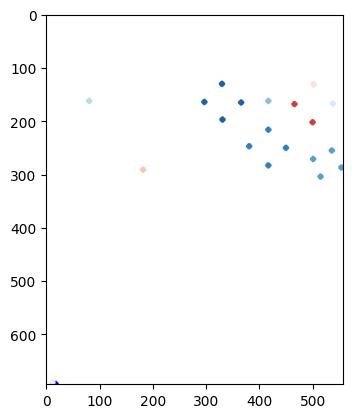

In [140]:
# method 1 - use local test class
env = BasicEnv10()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
#print(state)
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [141]:
import sys
env = BasicEnv10()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None and reward!=0:
        print("Reward = {} with action = {}".format(reward,action))    

    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

worker, target <rect(83, 163, 12, 12)> <rect(81, 163, 12, 12)>
The worker rect is : <rect(83, 163, 12, 12)>
The target rect is : <rect(81, 163, 12, 12)>
reward 1
worker, target <rect(83, 163, 12, 12)> <rect(81, 163, 12, 12)>
The worker rect is : <rect(83, 163, 12, 12)>
The target rect is : <rect(81, 163, 12, 12)>
reward 1
worker, target <rect(183, 291, 12, 12)> <rect(182, 292, 12, 12)>
The worker rect is : <rect(183, 291, 12, 12)>
The target rect is : <rect(182, 292, 12, 12)>
reward 1
worker, target <rect(183, 291, 12, 12)> <rect(182, 292, 12, 12)>
The worker rect is : <rect(183, 291, 12, 12)>
The target rect is : <rect(182, 292, 12, 12)>
reward 1
worker, target <rect(295, 165, 12, 12)> <rect(297, 165, 12, 12)>
The worker rect is : <rect(295, 165, 12, 12)>
The target rect is : <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(295, 165, 12, 12)> <rect(297, 165, 12, 12)>
The worker rect is : <rect(295, 165, 12, 12)>
The target rect is : <rect(297, 165, 12, 12)>
reward 4
worker, targ

SystemExit: 

In [6]:
# Snippet how to add text to pygame
import pygame
import sys
# Initialize pygame
pygame.init()
#scren dimension
sur_obj=pygame.display.set_mode((300,300))
# Screen caption
pygame.display.set_caption("Text in Pygame")
font_color=(0,50,250)                                      # Step 1  Color RGB code
font_obj=pygame.font.Font("C:\Windows\Fonts\Arial.ttf",20) # Step 2  Select the font type
# Render the objects
text_obj=font_obj.render("Reward",True,font_color)         # Step 3  Creation of object text
while True:
    sur_obj.fill((255,255,255))
    sur_obj.blit(text_obj,(22,50))                         # Step 4  Display the object text
    for eve in pygame.event.get():
        if eve.type==pygame.QUIT:
            pygame.quit()
            sys.exit()
    pygame.display.update()

SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Adding image background and reward text

In [5]:
# import required module
from PIL import Image
# get image
filepath = "bg.jpg"
img_bg = Image.open(filepath)
# get width and height
width = img_bg.width
height = img_bg.height
print(width,height)

609 719


In [1]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import pygame
from pygame import display
from pygame.surfarray import array3d
import random
import pandas as pd
from PIL import Image

training=False

df= pd.read_csv("test.csv")
feature1=df['island'].max()
feature2=df['project'].max()
feature3=df['energy_consumption'].max()
feature4=df['emp_project'].max()
feature5=df['emp_energy_consumption'].max()
max_colors=df['island'].nunique()
low_x=int(df['x_coord'].min())
high_x=int(df['x_coord'].max())
low_y=int(df['y_coord'].min())
high_y=int(df['y_coord'].max())
possible_clicks=df.shape[0]
pos_x=possible_clicks
pos_y=possible_clicks
max_sit=possible_clicks



# get image
filepath = "bg.jpg"
img_bg = Image.open(filepath)
# get width and height
width = img_bg.width
height = img_bg.height
  
font_color=(0,50,250)


WHITE = pygame.Color(255, 255, 255)
RED = (200,0,0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

#Load images
#To the image we assing a kind of gym object
worker_pos=[25,25]
#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_rects={}
target_images={}

counts = df.groupby(['island'])['island'].count()
reward_dict=counts.to_dict()

def convert_colormap_to_hex(cmap, x, vmin=0, vmax=1):
    """
    Example::
        >>> seaborn.palplot(seaborn.color_palette("RdBu_r", 7))
        >>> colorMapRGB = seaborn.color_palette("RdBu_r", 61)
        >>> colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
        >>> [convert_colormap_to_hex(colormap, x, vmin=-2, vmax=2) for x in range(-2, 3)]
        ['#09386d', '#72b1d3', '#f7f6f5', '#e7866a', '#730421']
    """
    norm = colors.Normalize(vmin, vmax)
    color_rgb = plt.cm.get_cmap(cmap)(norm(x))
    color_hex = colors.rgb2hex(color_rgb)
    return color_hex

import  seaborn
from matplotlib import colors
from PIL import ImageColor
colorMapRGB = seaborn.color_palette("RdBu_r", max_colors)
colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
cmap_list=[convert_colormap_to_hex(colormap, x, vmin=-int(max_colors/2)-1, vmax=int(max_colors/2)+1) for x in range(-int(max_colors/2)-1, int(max_colors/2)+1)]





class BasicEnv11(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(possible_clicks)
        self.observation_space = gym.spaces.Dict(
    {"feature1": gym.spaces.Box(low=0, high=feature1, shape=(1,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8),
     "x_position": gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8)
     }
        )
        
        # We inizialize the display
        
        
        
        self.frame_size_x = width # high_x
        self.frame_size_y = height# high_y
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        

        #Load images
        #To the image we assing a kind of gym object
        self.worker_pos=[25,25]
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_pos[0], self.worker_pos[1]),6) # DRAW CIRCLE

        # Moreover we add a position in the screen display

        self.target_rects={} 
        n_space=df.shape[0]
        for num in range(n_space):
            targets=int(df['x_coord'][num]), int(df['y_coord'][num])

            
            
            numero_cluster=df['island'][num]
            cmap_color=cmap_list[numero_cluster-1]
            
            target_images[num] = pygame.draw.circle(self.game_window,cmap_color,(targets[0], targets[1]),6) # DRAW CIRCLE
            self.target_rects[num] = target_images[num]
            #print('Initial positions',targets)
            self.target_rects[num].center = targets
    
        self.state = None
        

        
        # Adding text
        pygame.init()
        self.font_color=(0,50,250)                                       # Step 1  Color RGB code
        self.font_obj=pygame.font.Font("C:\Windows\Fonts\Arial.ttf",20)  # Step 2  Select the font type
        # Render the objects
        self.text_obj=self.font_obj.render("Reward:",True,self.font_color) # Step 3  Creation of object text
        
     
    
    def reward_value(self,worker,target,num):
        
        #Check for collision between two rects            
        if worker.colliderect(target):
        
            number_island=df['island'].iloc[num]
            reward=reward_dict[number_island]
            
            print("worker, target",worker, target)
            
            
        else:
            reward=0
        return reward
    
    
    def step(self, action):
        reward = 0
        self.worker_pos = self.move(action, self.worker_pos)
        # regardless of the action, game is done after a single step

        
        done = True
        info = {}

        if action != None:
            #print(self.worker_rect,self.target_rect)
            
            n_space=df.shape[0]
            for num in range(n_space):
                reward = self.reward_value(self.worker_rect,self.target_rects[num],num)
                if reward !=0:
                    #print("The worker rect is :",self.worker_rect)
                    #print("The target rect is :",self.target_rects[num] )
                    print("reward",reward)
     
                    # Render the objects
                    self.text_obj=self.font_obj.render("Reward :" + str(reward),True,self.font_color) # Step 3  Creation of object text
        
                
        # We update the state with an image
        self.update_game_state()
        
        
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]

            #'CLICK'
            action = mouse_x, mouse_y
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            
            #'CLICK'
            action = mouse_x, mouse_y
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        return action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        if training == True:
            self.game_window.fill(WHITE)
        else:    
            bg = pygame.image.load("bg.jpg")
            #Give a background color to the display
            self.game_window.blit(bg, (0, 0))
        
        # -------------WORKER--------------
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        #Draw rectangles to represent the rect's of each object
        pygame.draw.circle(self.game_window,BLUE,(self.worker_rect.x,self.worker_rect.y),6) # DRAW CIRCLE
        
        
        #-------------- Multiple points TARGETS------------------
        n_space=df.shape[0]
        for num in range(n_space):
            numero_cluster=df['island'][num]
            cmap_color=cmap_list[numero_cluster-1]
            pygame.draw.circle(self.game_window,cmap_color,(self.target_rects[num].x,self.target_rects[num].y),6) # DRAW CIRCLE
            
        #Display text
        self.game_window.blit(self.text_obj,(300,0))
    
    
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        self.state = self.observation_space.sample()        
        sit_random = np.random.randint(1, 9)
        self.state['x_position'][sit_random:] = 0
        self.state['y_position'][sit_random:] = 0
        self.state['feature1'][sit_random:] = 0
    
        #state = 0
        #return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if not action:
            return worker_pos
        else:
            return action
        #return worker_pos    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass

pygame 2.1.2 (SDL 2.0.18, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


action_n 3
(557, 294)
Reward = 0 with action = (557, 294)
0 True {}


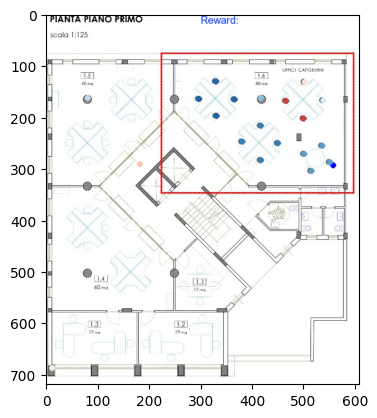

In [2]:
# method 1 - use local test class
env = BasicEnv11()
env.reset()
action_n = env.action_space.sample()
print('action_n',action_n)
action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
#print(state)
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [3]:
import sys
env = BasicEnv11()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 


#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
    state, reward, done, info = env.step(action)
    
    if action != None and reward!=0:
        print("Reward = {} with action = {}".format(reward,action))    
    

    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

worker, target <rect(301, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 164, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(299, 165, 12, 12)> <rect(297, 165, 12, 12)>
reward 4
worker, target <rect(330, 127, 12, 12)> <rect(330, 131, 12, 12)>
reward 4
Reward = 4 with action = (365, 163)
worker, target <rect(365, 163, 12, 12)> <rect(366, 166, 12, 12)>
reward 4
worker, target <rect(417, 165, 12, 12)> <rect(417, 163, 12, 12)>
reward 1
worker, target <rect(417, 218, 12, 12)> <rect(417, 217, 12, 12)>
reward 4
wo

SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
